In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.linalg
from math import sqrt

from problem import ElecVehCharg
from algorithms import UDC
import networkx as nx
import matplotlib.pyplot as plt
from plot_utils import MyFigure, MyFigureThree

# Set up the logger to print info messages for understandability.
import logging
import sys
import os
logging.basicConfig(level=logging.INFO, stream=sys.stdout, format='')

import json

Text(0.5, 1.0, '2 cliques')

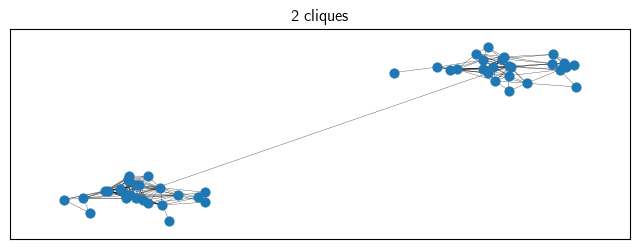

In [2]:
# read network graphs

N = 50  # num of nodes

graph_dir = 'graphs'
graph_names = [
    'complete_graph',
    'erdos_renyi_graph',
    'geometric_random_graph',
    '2_cliques',
    'ring_graph',
    'spanning_tree'
]
graphs = {}

for name in graph_names:
    with open(f'{graph_dir}/{name}.json') as f:
        data = json.load(f)
        graphs[name] = nx.node_link_graph(data, edges="links")

# test data
name = '2_cliques'
G = graphs[name]
nodes_data = G.nodes.data()
pos = {i: nodes_data[i]['pos'] for i in range(N)}

options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.2,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)
subax1.set_title(name.replace('_', ' '))

In [13]:
# generate problem data
# N = 50
prob = ElecVehCharg(N)
# prob = Synthetic(parameters, debug=True)

prob.gen()
prob.load()
# print(f'x* {prob.x_star}')
print(f'||x*|| {np.linalg.norm(prob.x_star)}')

# g = prob.opt_cons_vio
# Mg = np.identity(num_node) - network
# g_in_Null_H = sqrt(g.T @ Mg @ g)
# g_norm = np.linalg.norm(g)
# print(f'||tilg(x*)|| {g_norm}')
# print(f'1 - ||tilg(x*)||_H / ||tilg(x*)|| {1-g_in_Null_H/g_norm}\n')

generating a ElecVehCharg problem, N=50
x* [ 1.05e-11 -2.81e-13  1.57e-10  1.34e-01  1.00e+00  1.00e+00  4.11e-11
  1.00e+00  1.44e-11  2.08e-11  1.82e-11 -2.95e-12  7.93e-11  2.41e-01
  6.02e-01  1.00e+00  7.16e-13  7.53e-11  2.46e-11 -1.57e-12  2.21e-01
 -4.09e-12  3.07e-02  8.66e-01  1.83e-02  1.91e-01  1.00e+00  1.00e+00
  3.73e-12 -5.50e-13  3.41e-11  8.72e-12  4.35e-12  9.60e-02  2.00e-02
  1.00e+00  6.80e-11  1.68e-11  8.81e-11  5.56e-11  7.58e-12  2.72e-11
  1.09e-10  2.23e-11  1.00e+00  1.00e-11  5.17e-11  7.23e-02  4.08e-12
  1.17e-01], f* 2.1073939612320154
generated problem saved in problem_data/N50
loading a ElecVehCharg problem, N=50
problem loaded:
c (50,)
d (50,)
b (1,)
x_star (50,)
opt_val 2.1073939612320154
||x*|| 3.050188293502867


In [3]:
# # load instance 1
N = 50
instance_name = 'instance1_N50'
instance_dir = 'problem_data/' + instance_name

# problem data
prob = ElecVehCharg(N)
prob.save_dir = instance_dir
prob.load()

print(f'x* {prob.x_star}')
print(f'||x*|| {np.linalg.norm(prob.x_star)}\n')

# network adjacency matrices
networks = {}
for name, G in graphs.items():
    networks[name] = nx.to_numpy_array(G)
    
print(networks['2_cliques'].shape)


loading a ElecVehCharg problem, N=50
problem loaded:
c (50,)
d (50,)
b (1,)
x_star (50,)
opt_val 1.209571107526383
x* [-2.11401576e-12  1.28881545e-11  1.38898171e-12  2.43160426e-11
  4.16490051e-11  7.55921004e-10  4.32310566e-12  7.07364358e-12
  5.82929481e-01  1.58987190e-11 -3.37208266e-12  1.00000000e+00
  5.25798562e-11  4.13658467e-11  3.53306348e-14 -4.03367475e-12
  6.13188115e-01  1.17113193e-12  5.55763272e-11  1.43528376e-11
  8.75441609e-12  3.23188039e-01  9.99999999e-01  2.61028772e-10
  1.63091895e-11  1.62559645e-10  1.00000000e+00  9.95318428e-05
  6.42030173e-11  1.00000000e+00  4.45583690e-11  1.13120622e-10
  2.89104645e-11  1.00000000e+00  1.00000000e+00  1.00000000e+00
  3.11873916e-11  5.40684449e-01  4.49118111e-01  2.94163642e-11
 -3.98174369e-13 -6.33292486e-12  4.14074177e-11  2.36615806e-11
  1.74125065e-10  2.02838437e-01  9.23193847e-11  4.74930097e-11
  3.03050204e-01  8.10488687e-13]
||x*|| 2.9064216087874417

(50, 50)


In [4]:
# prepare figures

figures = MyFigureThree()

log_dir = 'log'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
np.set_printoptions(formatter={'float':lambda x: f' {x:.2e}' if x>0 else f'{x:.2e}'})

In [11]:
# UDC finetuning

# best rho (with last iter oe+cv):
#               complete    geometric   2_cliques   erdos   ring    tree
# UDC_New1      1           2           2           1       2       1
# UDC_PEXTRA    0.25        2           2           2       1       0.5
# UDC_PGC       0.015625    0.25        0.25        0.125   1       0.25
# UDC_DistADMM  0.015625    2           0.5         0.5     8       4
# ALT           0.5         16          4           8       16      8


# MAX_ITER = 500
# MAX_ITER = 1000
MAX_ITER = 2000

# rho_choice = [0.1, 1, 10]
rho_choice = [
    0.0078125,
    0.015625,
    0.03125,
    0.0625,
    0.125, 
    0.25, 
    0.5, 
    1, 
    2, 
    4, 
    8, 
    16,
    32
]
# rho_choice = [0.1, 0.2, 0.5, 1, 2]
# rho_choice = [0.05, 0.1, 0.2, 0.5, 1, 2, 4, 10]
# rho_choice = [0.01, 0.02, 0.03]
# rho_choice = [1]

figures.clear()

graph_names = [
    'complete_graph',
    'geometric_random_graph',
    '2_cliques',
    'erdos_renyi_graph',
    'ring_graph',
    'spanning_tree'
]
param_settings = [
    'New1',
    'PEXTRA',
    'PGC', 
    # 'DPGA', 
    'DistADMM', 
    'ALT',
]
alg_names = {
    'New1' : 'UDC_New1',
    'PEXTRA' : 'UDC_PEXTRA',
    'PGC' : 'UDC_PGC',
    'DPGA' : 'UDC_DPGA',
    'DistADMM' : 'UDC_DistADMM',
    'ALT' : 'ALT',
}

# param_settings = ['DistADMM', 'ALT']
# param_setting = param_settings[3]

for graph_name in graph_names:
    print(f'graph: {graph_name}')
    graph_adj = networks[graph_name]
    log_dir = f'log/{graph_name}'
    
    for param in param_settings:
        figures.clear()
        for rho in rho_choice:            
            # if log already exists
            log_prefix = f'{alg_names[param]}_a{0}_r{rho}'
            filename_oe_cv = f'log/{graph_name}/{log_prefix}_oe_cv.txt'
            if os.path.exists(filename_oe_cv):
                log = np.loadtxt(filename_oe_cv)
                if log.shape[0] >= MAX_ITER:
                    figures.add_lines(graph_name, log_prefix)
                    figures.paint(MAX_ITER=MAX_ITER)
                    continue
            
            if True:
            # if rho != 1:
            # if rho == 2:
            # if rho == 0.2:
            # if rho != 0.1:
            # if rho == 0.005:
                alg = UDC(prob, log_dir, graph_adj, rho=rho, alpha=0,
                            param_setting=param, verbose=False)
                for i in range(MAX_ITER):
                    alg.step()

            # save convergence plot from files    
            figures.add_lines(graph_name, log_prefix)
            figures.paint(MAX_ITER=MAX_ITER)

graph: complete_graph
graph: geometric_random_graph
graph: 2_cliques
UDC setting: ALT
d: (50,)
reset
ALT alpha 0 rho 4, iter 0, obj err: 1.21e+00, cons vio: 5.00e+00
time 0.02, saved

ALT alpha 0 rho 4, iter 100, obj err: 2.39e-03, cons vio: 2.39e-01
time 1.22, saved

ALT alpha 0 rho 4, iter 200, obj err: 1.36e-01, cons vio: 4.33e-02
time 2.46, saved

ALT alpha 0 rho 4, iter 300, obj err: 1.63e-01, cons vio: 0.00e+00
time 3.63, saved

ALT alpha 0 rho 4, iter 400, obj err: 1.56e-01, cons vio: 0.00e+00
time 4.82, saved

ALT alpha 0 rho 4, iter 500, obj err: 1.51e-01, cons vio: 0.00e+00
time 6.03, saved

ALT alpha 0 rho 4, iter 600, obj err: 1.45e-01, cons vio: 0.00e+00
time 7.30, saved

ALT alpha 0 rho 4, iter 700, obj err: 1.41e-01, cons vio: 0.00e+00
time 8.53, saved

ALT alpha 0 rho 4, iter 800, obj err: 1.36e-01, cons vio: 0.00e+00
time 9.80, saved

ALT alpha 0 rho 4, iter 900, obj err: 1.31e-01, cons vio: 0.00e+00
time 11.08, saved

ALT alpha 0 rho 4, iter 1000, obj err: 1.26e-01, c

In [12]:
# find the first "k" and "rho" that 
# "alg" achieve oe+cv < "eps" at "graph" 

# oe_cv_0: objective error + constraint violation at x^0=0:
oe_cv_0 = abs(prob.opt_val) + prob.b

epss = [1e-1 * oe_cv_0, 
        1e-2 * oe_cv_0, 
        1e-3 * oe_cv_0, 
        1e-4 * oe_cv_0]
print('eps', epss)

alg_names = ['UDC_New1', 'UDC_PEXTRA', 'UDC_PGC', 'UDC_DistADMM', 'ALT']
graph_names = [
    'complete_graph',
    'geometric_random_graph',
    '2_cliques',
    'erdos_renyi_graph',
    'ring_graph',
    'spanning_tree'
]
rho_choice = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, \
    1, 2, 4, 8, 16, 32]


# find the first k when rel. err. < 1e-4

best_rhos = {} # keys: alg, graph

for alg in alg_names:
    best_rhos[alg] = {}
    
    for graph in graph_names:
        # load all rho choices,     
        # find first k for eah file,
        # then compare these k  
        first_k = np.zeros(len(rho_choice), dtype=np.int32)
        
        for rho in rho_choice:
            k = 3001
            filename = f'log/{graph}/{alg}_a0_r{rho}_oe_cv.txt'
            if os.path.exists(filename):
                log = np.loadtxt(filename)
                indices = np.argwhere(log < epss[3])
                if indices.shape[0] != 0: # if oe+cv is not always above eps
                    k = indices[0, 0]                
            first_k[rho_choice.index(rho)] = k
            
        best_rho = rho_choice[np.argmin(first_k)]
        best_rhos[alg][graph] = best_rho

# asign a list of k's for each alg, prepare for plotting 
first_ks_alg_lists = [] 
for i in range(len(epss)): # iterate through 4 eps
    first_ks_alg_lists.append({})
    for alg in alg_names:
        first_ks_alg_lists[i][alg] = []
        for graph in graph_names:
            rho = best_rhos[alg][graph]
            filename = f'log/{graph}/{alg}_a0_r{rho}_oe_cv.txt'
            log = np.loadtxt(filename)
            indices = np.argwhere(log < epss[i])
            k = 3001
            if indices.shape[0] != 0: # if oe+cv is not always above eps
                k = indices[0, 0]                
            first_ks_alg_lists[i][alg].append(int(k))
            
            
print(first_ks_alg_lists)
print(best_rhos)

with open('first_ks' + '.json', 'w', encoding="utf-8") as f:
    json.dump(first_ks_alg_lists, f)
with open('best_rhos' + '.json', 'w', encoding="utf-8") as f:
    json.dump(best_rhos, f)

eps [array([ 6.21e-01]), array([ 6.21e-02]), array([ 6.21e-03]), array([ 6.21e-04])]
[{'UDC_New1': [10, 17, 13, 6, 10, 4], 'UDC_PEXTRA': [3, 22, 16, 21, 8, 5], 'UDC_PGC': [7, 31, 21, 6, 15, 4], 'UDC_DistADMM': [7, 210, 46, 15, 109, 33], 'ALT': [5, 180, 30, 84, 120, 54]}, {'UDC_New1': [19, 28, 30, 14, 17, 36], 'UDC_PEXTRA': [15, 37, 48, 41, 12, 61], 'UDC_PGC': [15, 63, 55, 12, 26, 34], 'UDC_DistADMM': [58, 400, 81, 23, 173, 56], 'ALT': [10, 360, 78, 187, 317, 123]}, {'UDC_New1': [23, 30, 37, 39, 101, 44], 'UDC_PEXTRA': [16, 41, 59, 45, 12, 72], 'UDC_PGC': [16, 74, 62, 13, 29, 40], 'UDC_DistADMM': [104, 444, 86, 108, 189, 277], 'ALT': [34, 436, 98, 230, 405, 159]}, {'UDC_New1': [23, 120, 37, 40, 140, 63], 'UDC_PEXTRA': [28, 122, 60, 45, 12, 94], 'UDC_PGC': [34, 165, 106, 40, 29, 41], 'UDC_DistADMM': [104, 449, 86, 119, 191, 279], 'ALT': [35, 450, 102, 239, 417, 408]}]
{'UDC_New1': {'complete_graph': 1, 'geometric_random_graph': 2, '2_cliques': 2, 'erdos_renyi_graph': 1, 'ring_graph': 2, 

In [13]:
from matplotlib import rc, font_manager
from matplotlib.ticker import FormatStrFormatter, LogFormatter
from matplotlib.legend_handler import HandlerTuple

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times",
    "font.sans-serif": "Helvetica",
    "font.size": 45,
    # 'text.latex.preamble': r'\usepackage{sfmath}' # sans-serif for math
    'text.latex.preamble': r'\usepackage{newtxtext} \usepackage{amssymb} \usepackage{amsmath}',
    'axes.facecolor': '#e8e8e8'
})

alg_names_plot = {
    'UDC_New1': 'DUCA-I',
    'UDC_PEXTRA': 'DUCA-PEXTRA',
    'UDC_PGC': 'DUCA-PGC',
    'UDC_DistADMM': 'DUCA-dist.ADMM',
    'ALT': 'ALT'
}

graph_names_plot = [
    'complete',
    'geometric',
    'two clusters',
    'Erdős-Rényi',
    'ring',
    'tree'
]
ls = {
    'UDC_New1':'d-', 
    'UDC_PEXTRA':'o-', 
    'UDC_PGC':'o-', 
    'UDC_DistADMM':'s-', 
    'ALT':'v-'
}

# set line colors
c = {
    'UDC_PEXTRA'        : 'crimson',
    'UDC_PGC'           : '#00f9ff',   # sky blue
    'UDC_DPGA'          : 'goldenrod',   # blue gray
    'UDC_DistADMM'      : 'xkcd:green',
    'ALT'               : 'xkcd:orange',
    'DPMM'              : 'lightseagreen',
    'IPLUX'             : 'xkcd:purple',
    'dual_subgradient'  : 'olive',
    'UDC_New1'          : 'black'
}


UDC_New1 2
UDC_PEXTRA 2
UDC_PGC 0.25
UDC_DistADMM 2
ALT 16
UDC_New1 1
UDC_PEXTRA 2
UDC_PGC 0.125
UDC_DistADMM 0.5
ALT 8


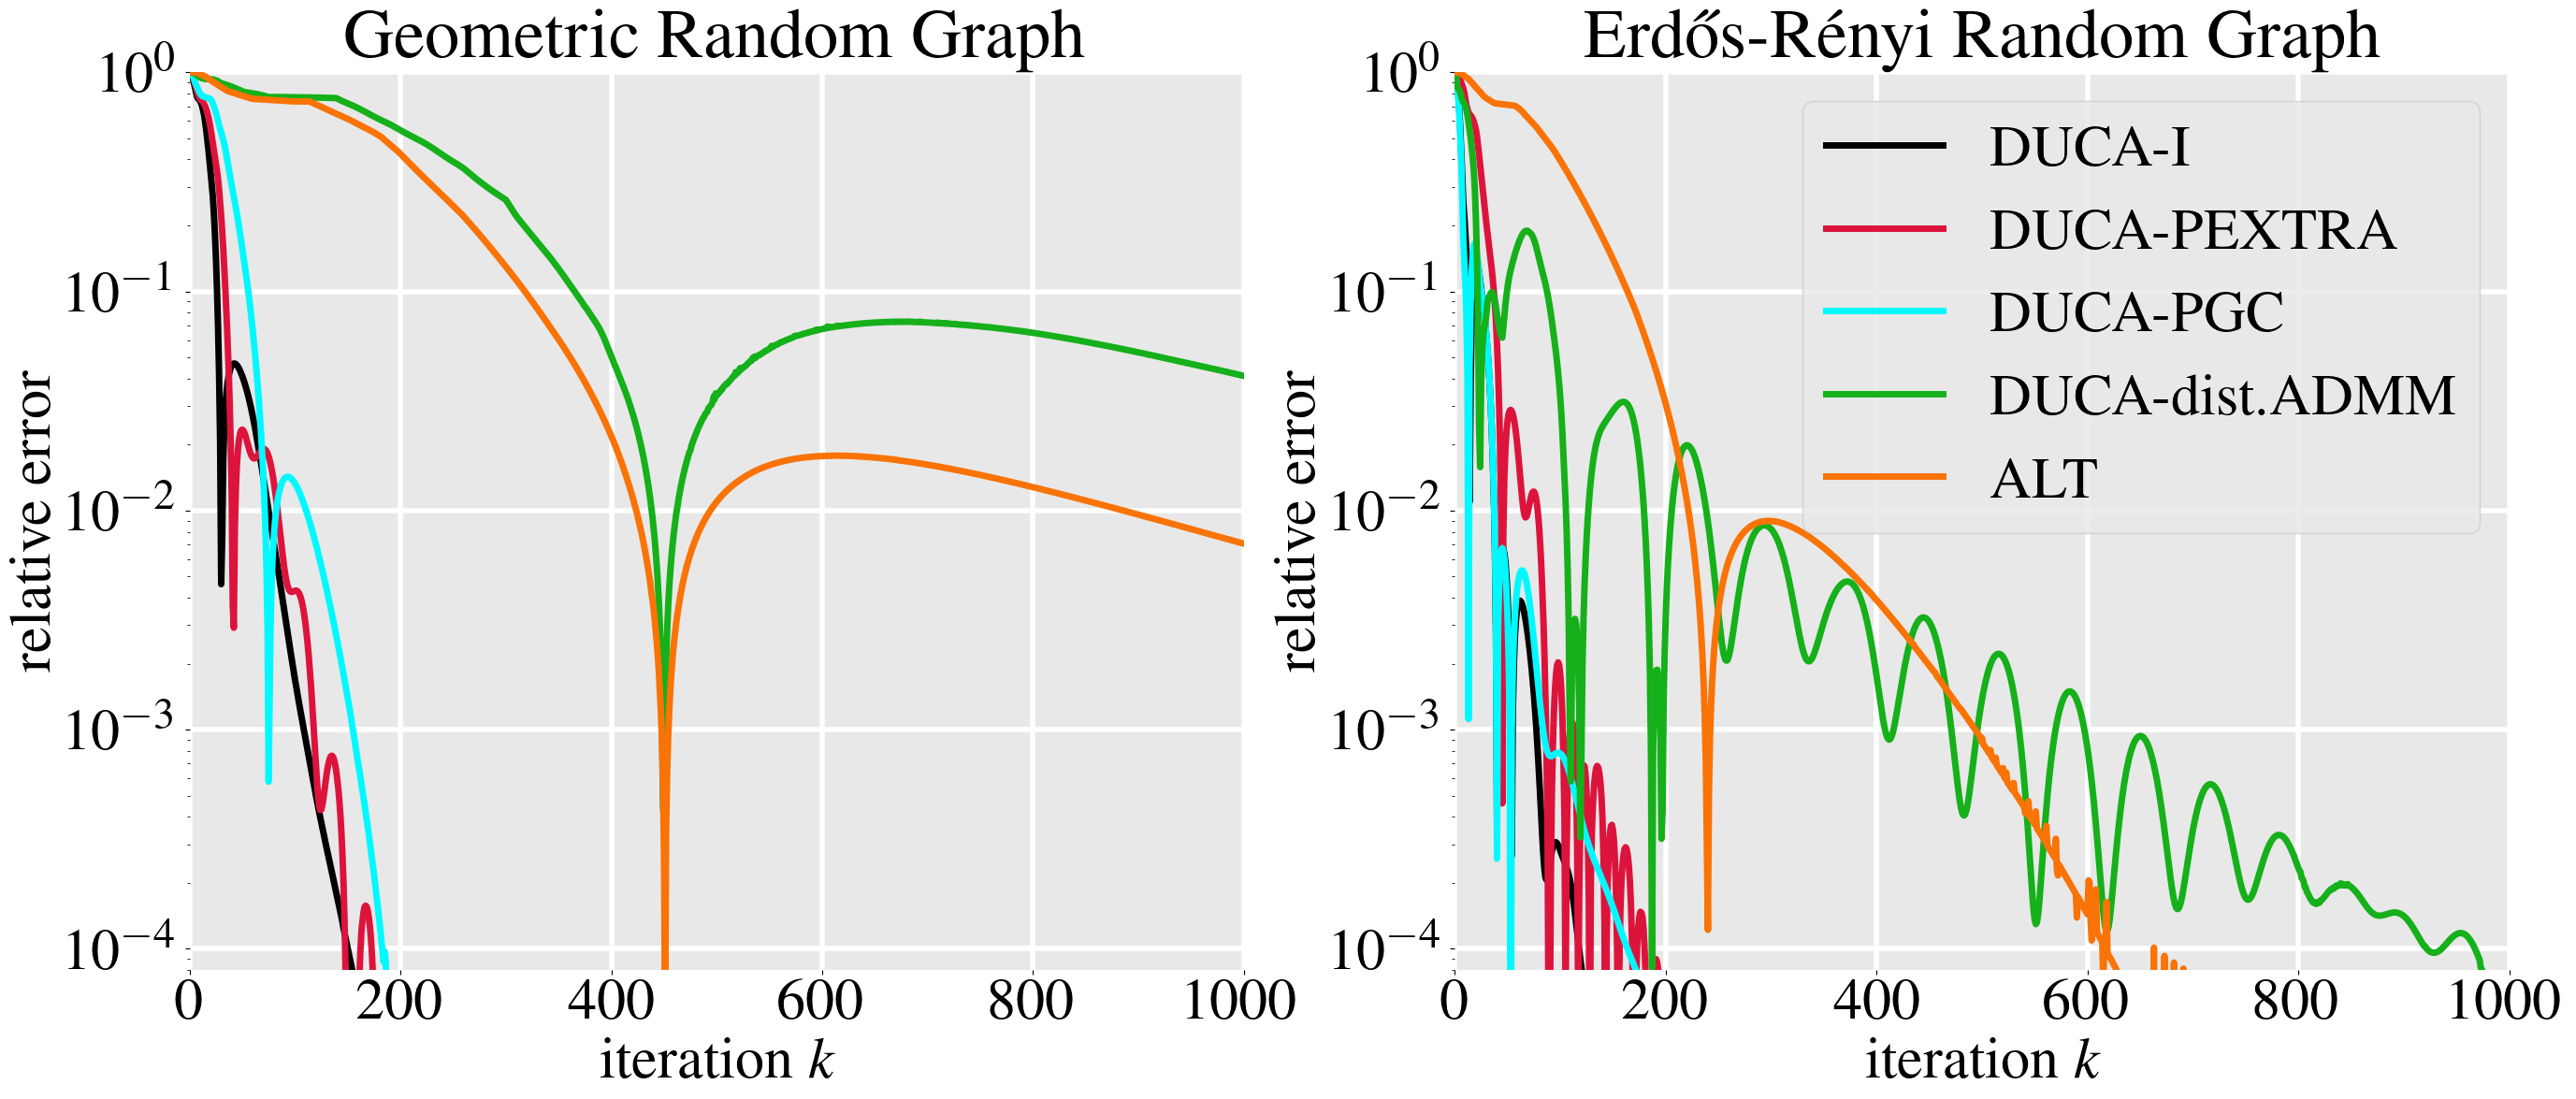

In [14]:
# plot convergences lines: iteration number against relative error
MAX_ITER = 1000
fig = plt.figure(figsize=(32, 12))
ax0 = plt.subplot2grid((1, 2), (0, 0))
ax1 = plt.subplot2grid((1, 2), (0, 1))
axs = [ax0, ax1]

axs[0].set_title('Geometric Random Graph')
axs[1].set_title('Erdős-Rényi Random Graph')

for i in range(len(axs)):
    axs[i].set_yscale('log')
    axs[i].set_ylim([8e-5, 1])
    axs[i].set_xlim([0, 1000])
    axs[i].set_ylabel('relative error', fontsize=45)
    axs[i].set_xlabel(r'iteration $k$', fontsize=45)
    axs[i].grid(True, lw=4, color='1')
    axs[i].tick_params(axis='both', labelsize=45)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False) 

graph = 'geometric_random_graph'
for alg in alg_names:
    rho = best_rhos[alg][graph] # best rho for rel. error 1e-4
    print(alg, rho)
    filename = f'log/{graph}/{alg}_a0_r{rho}_oe_cv.txt'
    log = np.loadtxt(filename)
    axs[0].plot(log[:MAX_ITER]/prob.opt_val, 
                linewidth = 5,
                color = c[alg],
                label=alg_names_plot[alg])

graph = 'erdos_renyi_graph'
for alg in alg_names:
    rho = best_rhos[alg][graph] # best rho for rel. error 1e-4
    print(alg, rho)
    filename = f'log/{graph}/{alg}_a0_r{rho}_oe_cv.txt'
    log = np.loadtxt(filename)
    axs[1].plot(log[:MAX_ITER]/prob.opt_val, 
                linewidth = 5,
                color = c[alg],
                label=alg_names_plot[alg])

axs[1].legend()
fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.4)
fig.savefig(f'chap5_two_convergence.pdf', bbox_inches='tight', pad_inches=0.5, transparent=False)

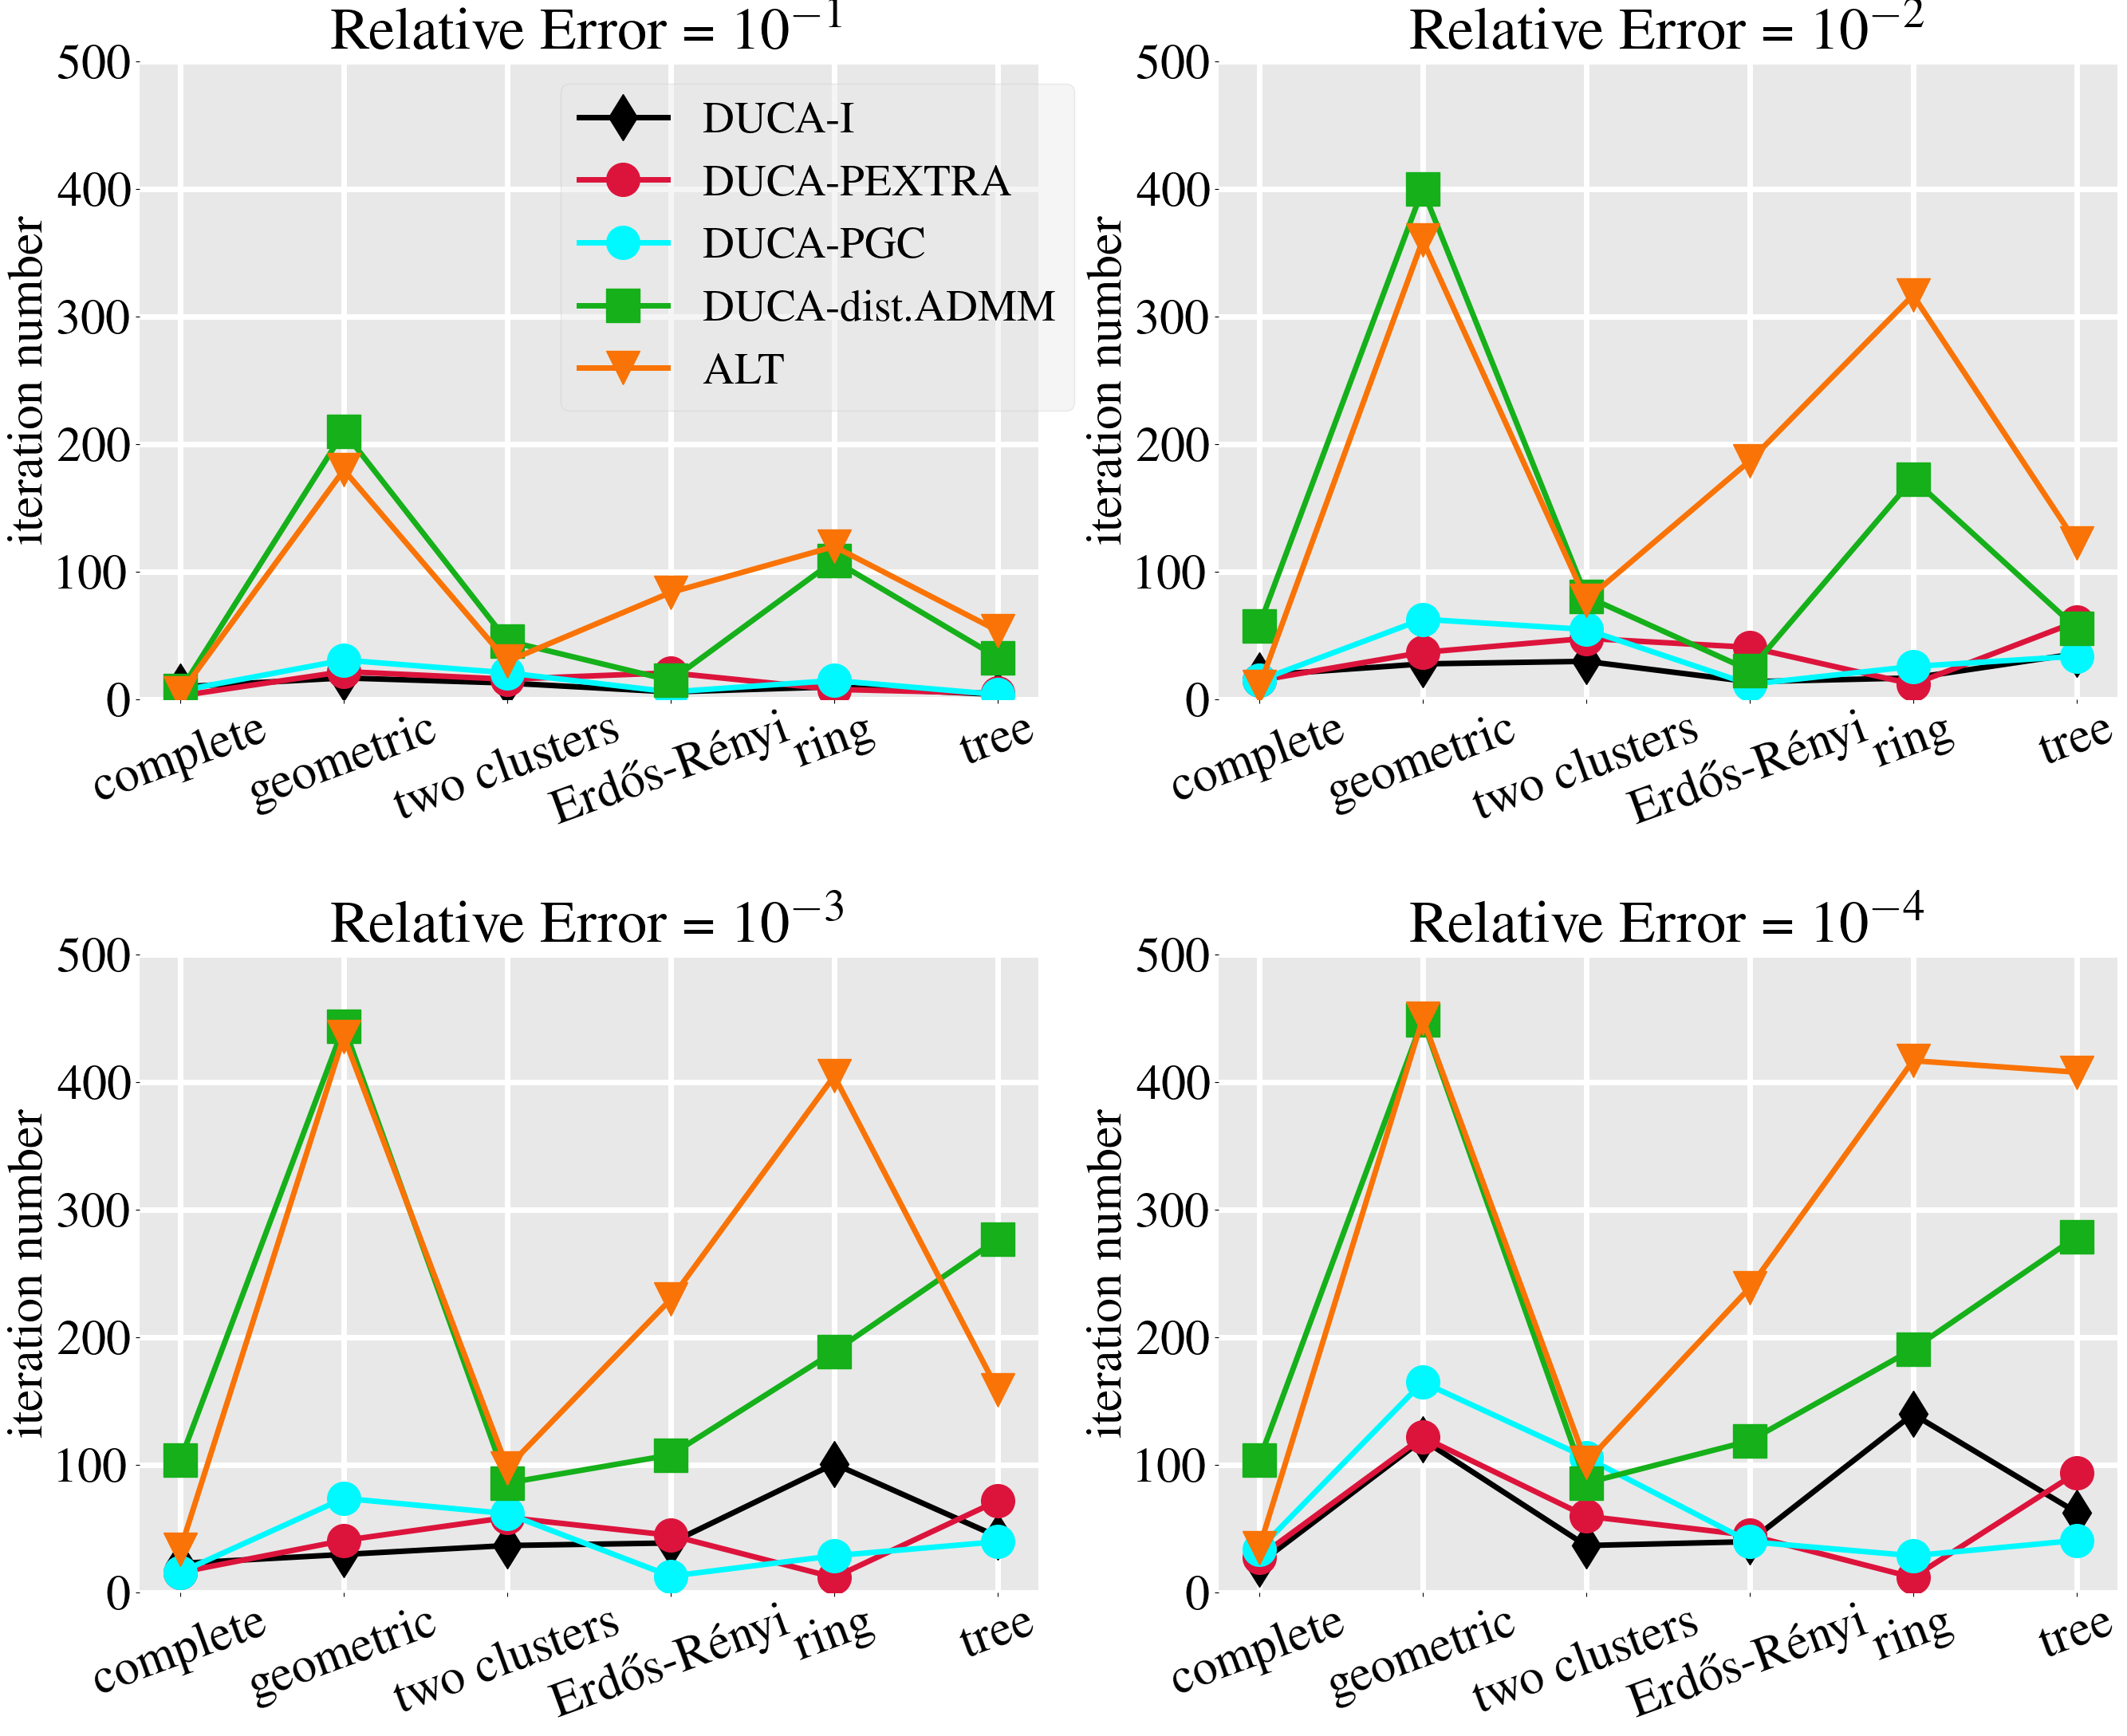

In [46]:
# plot graphs against iteration numbers

ylimits = [(0, 500), (0, 500), (0,500), (0,500)]
titles = [r'Relative Error = $10^{-1}$', r'Relative Error = $10^{-2}$', r'Relative Error = $10^{-3}$', r'Relative Error = $10^{-4}$']
ylabels = [r'iteration number', 'iteration number', r'iteration number', 'iteration number']

fig = plt.figure(figsize=(32, 24))
ax0 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (1, 1))
axs = [ax0, ax1, ax2, ax3]

for i in range(4):
    axs[i].set_title(titles[i])
    axs[i].set_ylim(ylimits[i])
    # axs[i].set_xlabel(r'''$\mathrm{(a)}$''', fontsize=45)
    axs[i].set_ylabel(ylabels[i], fontsize=45)
    axs[i].spines.bottom.set_linewidth(0)
    axs[i].spines.top.set_linewidth(0)
    axs[i].spines.left.set_linewidth(0)
    axs[i].spines.right.set_linewidth(0)
    axs[i].grid(True, lw=5, color='1')
    for label in axs[i].get_xticklabels(which='major'):
        label.set(rotation=20, horizontalalignment='center')

handles = []
handles = [i for i in range(len(alg_names))]
for i in range(4):
    for alg in alg_names:
        handles[alg_names.index(alg)], = \
            axs[i].plot(graph_names_plot, 
                        first_ks_alg_lists[i][alg],
                        ls[alg], 
                        markersize = 30,
                        linewidth = 5,
                        color = c[alg],
                        label=alg_names_plot[alg])
        
fig.legend(handles=handles, 
           fontsize=40,  
           bbox_to_anchor=(0.5, 0.9), # bbox (x, y, width, height)
           loc='upper right', 
           ncols=1, 
           framealpha=0.4)
fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.4)
fig.savefig(f'chap5_graph_to_iter.pdf', bbox_inches='tight', pad_inches=0.5, transparent=False)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

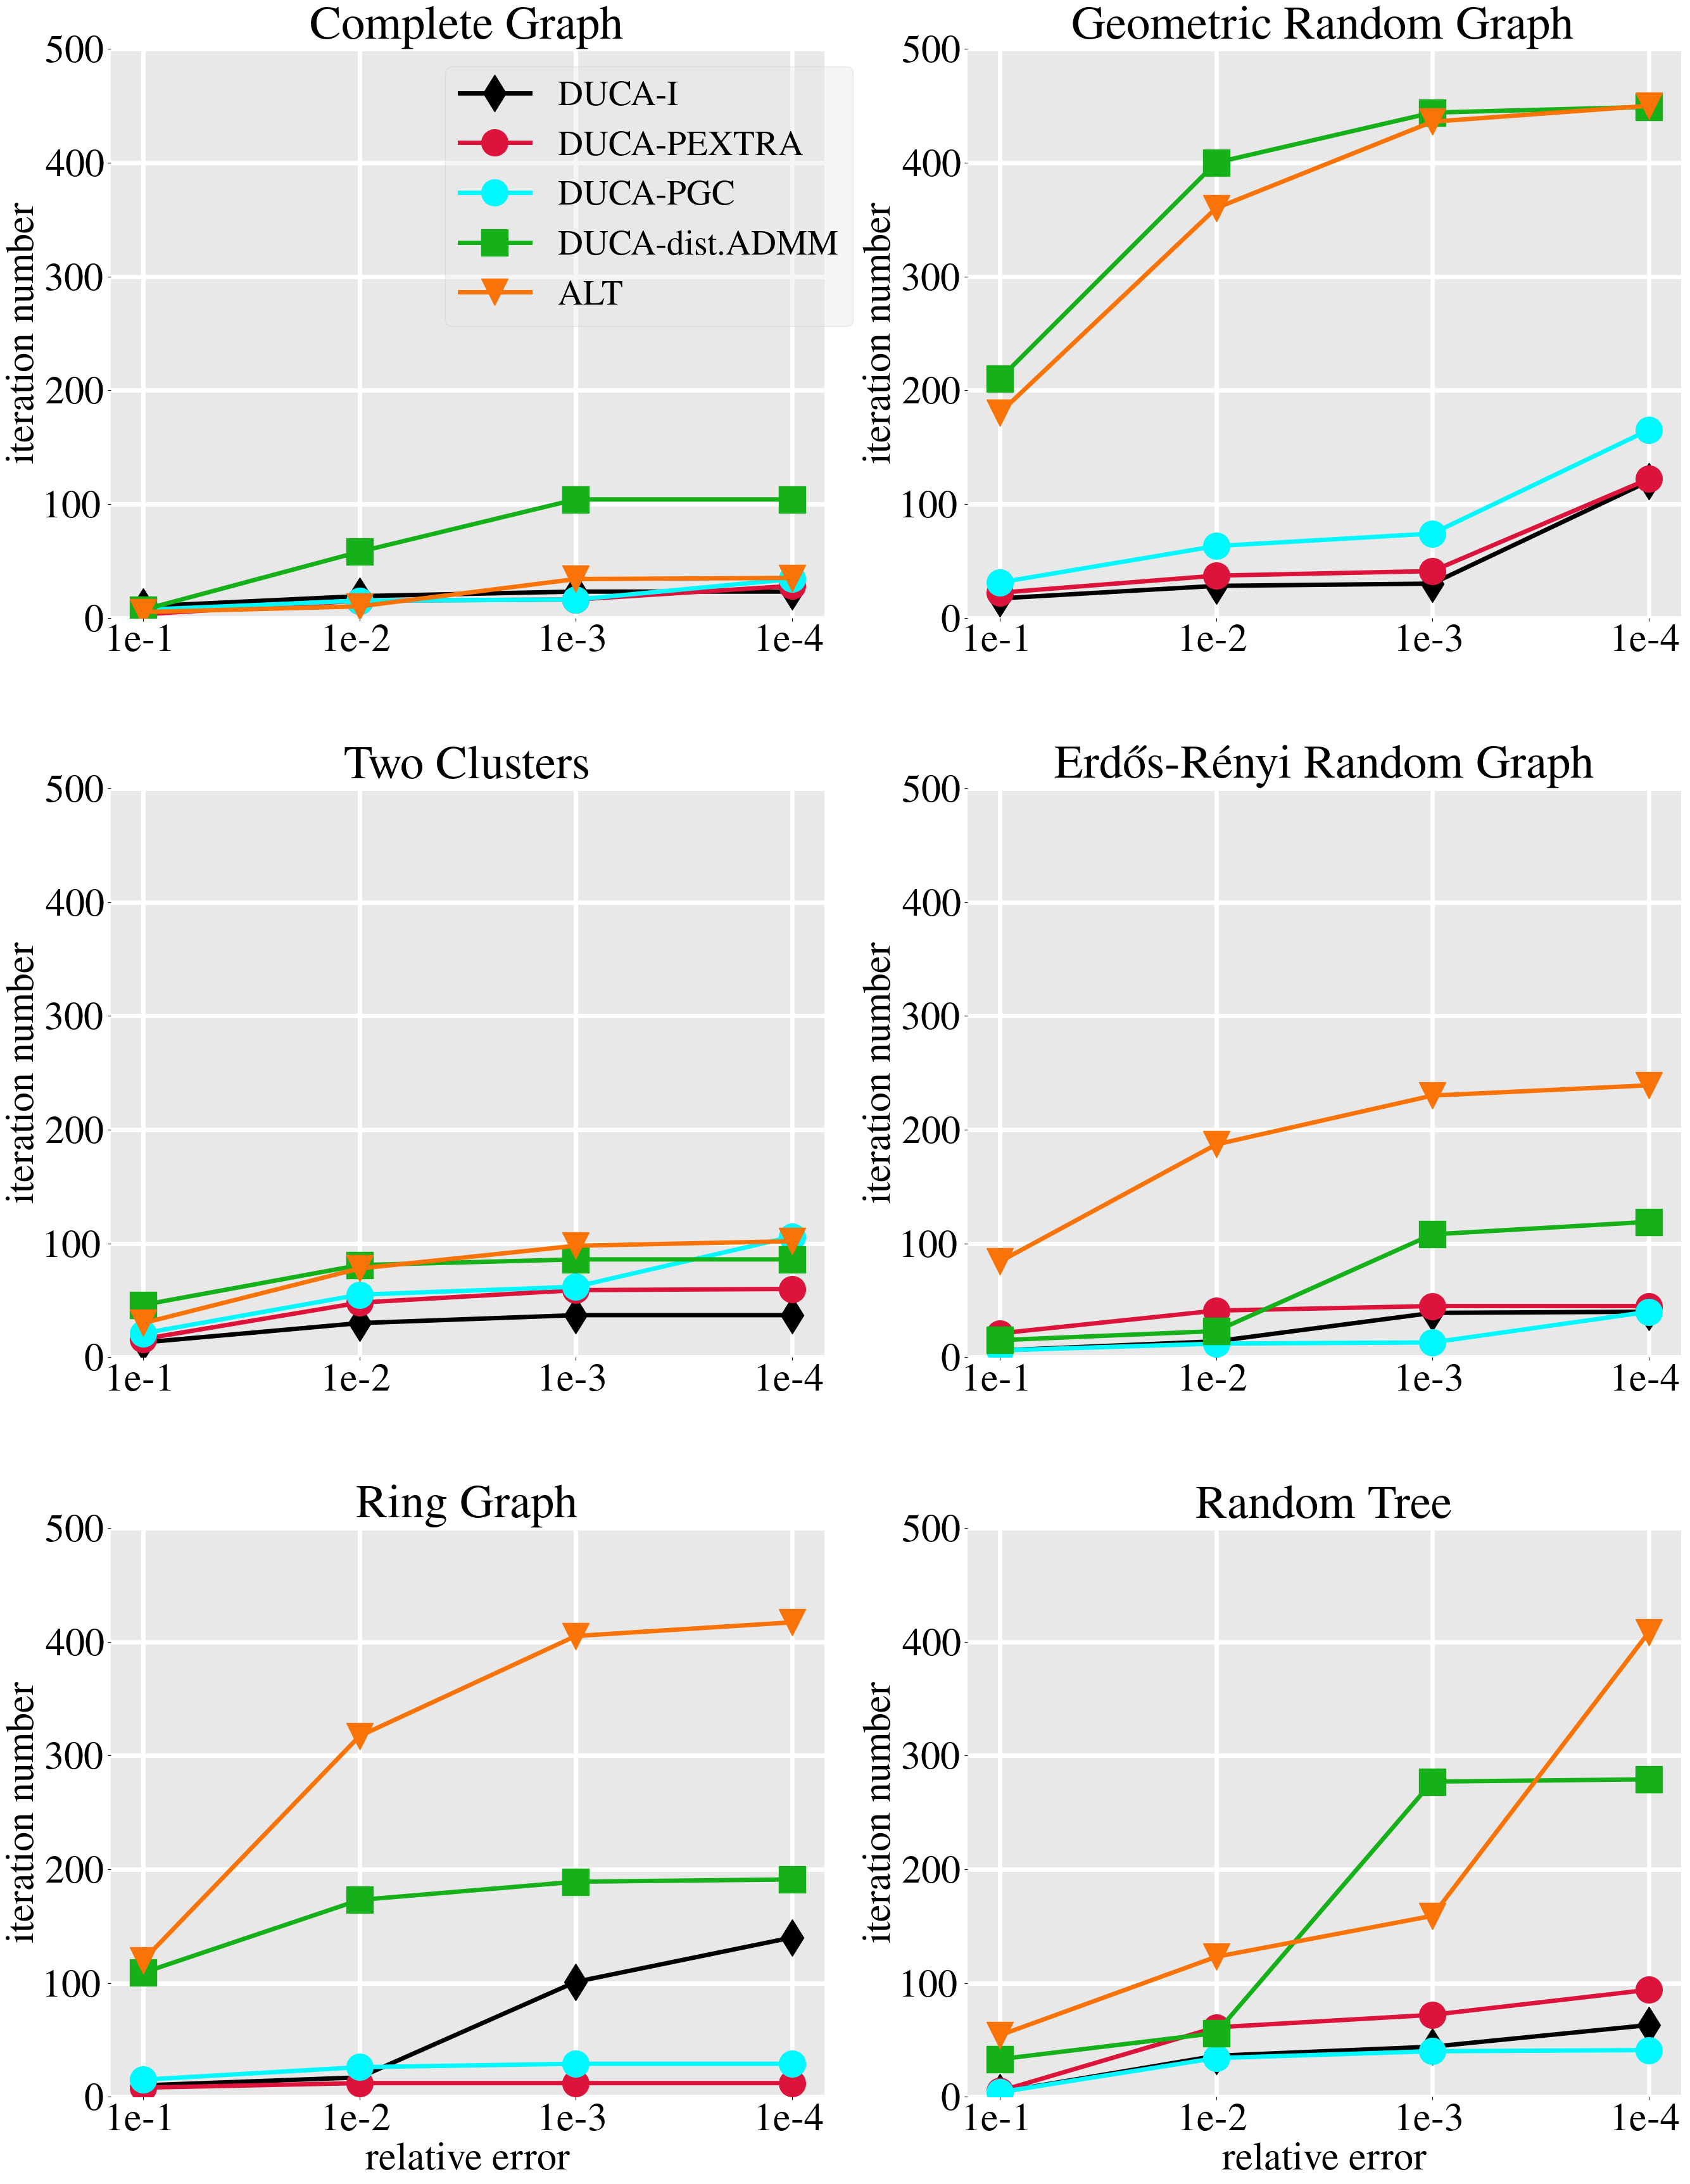

In [51]:
# plot graphs against iteration numbers

ylimits = [(0, 500), (0, 500), (0,500), (0,500)]
titles = [r'Relative Error = $10^{-1}$', r'Relative Error = $10^{-2}$', r'Relative Error = $10^{-3}$', r'Relative Error = $10^{-4}$']
ylabels = [r'iteration number', 'iteration number', r'iteration number', 'iteration number']

# fig = plt.figure(figsize=(32, 24))
# ax0 = plt.subplot2grid((2, 2), (0, 0))
# ax1 = plt.subplot2grid((2, 2), (0, 1))
# ax2 = plt.subplot2grid((2, 2), (1, 0))
# ax3 = plt.subplot2grid((2, 2), (1, 1))
# axs = [ax0, ax1, ax2, ax3]

# for i in range(4):
#     axs[i].set_title(titles[i])
#     axs[i].set_ylim(ylimits[i])
#     # axs[i].set_xlabel(r'''$\mathrm{(a)}$''', fontsize=45)
#     axs[i].set_ylabel(ylabels[i], fontsize=45)
#     axs[i].spines.bottom.set_linewidth(0)
#     axs[i].spines.top.set_linewidth(0)
#     axs[i].spines.left.set_linewidth(0)
#     axs[i].spines.right.set_linewidth(0)
#     axs[i].grid(True, lw=5, color='1')
#     for label in axs[i].get_xticklabels(which='major'):
#         label.set(rotation=20, horizontalalignment='center')

# handles = []
# handles = [i for i in range(len(alg_names))]
# for i in range(4):
#     for alg in alg_names:
#         handles[alg_names.index(alg)], = \
#             axs[i].plot(graph_names_plot, 
#                         first_ks_alg_lists[i][alg],
#                         ls[alg], 
#                         markersize = 30,
#                         linewidth = 5,
#                         color = c[alg],
#                         label=alg_names_plot[alg])
        
# fig.legend(handles=handles, 
#            fontsize=40,  
#            bbox_to_anchor=(0.5, 0.9), # bbox (x, y, width, height)
#            loc='upper right', 
#            ncols=1, 
#            framealpha=0.4)
# fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.4)
# fig.savefig(f'chap5_iter_to_rel_err.pdf', bbox_inches='tight', pad_inches=0.5, transparent=False)


ylimits = [(0, 500), (0, 500), (0,500), (0,500), (0,500), (0,500)]
xlabels = ['','','','','relative error', 'relative error']
xticks = [r'1e-1', r'1e-2', r'1e-3', r'1e-4']
titles = [
    'Complete Graph',
    'Geometric Random Graph',
    'Two Clusters',
    'Erdős-Rényi Random Graph',
    'Ring Graph',
    'Random Tree'
]


fig = plt.figure(figsize=(32, 42))
ax0 = plt.subplot2grid((3, 2), (0, 0))
ax1 = plt.subplot2grid((3, 2), (0, 1))
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))
axs = [ax0, ax1, ax2, ax3, ax4, ax5]

for ax in axs:
    i = axs.index(ax)
    ax.set_title(titles[i])
    ax.set_ylim(ylimits[i])
    ax.set_xlabel(xlabels[i], fontsize=45)
    ax.set_ylabel('iteration number', fontsize=45)
    ax.spines.bottom.set_linewidth(0)
    ax.spines.top.set_linewidth(0)
    ax.spines.left.set_linewidth(0)
    ax.spines.right.set_linewidth(0)
    ax.grid(True, lw=5, color='1')

first_ks_alg_lists2 = {} # prepare to plot iter k against rel. err.
for graph in graph_names:
    graph_id = graph_names.index(graph)
    first_ks_alg_lists2[graph] = {}
    for alg in alg_names:
        first_ks_alg_lists2[graph][alg] = []
        for i in range(len(epss)):
            first_ks_alg_lists2[graph][alg].append(first_ks_alg_lists[i][alg][graph_id])

handles = [0 for i in range(len(alg_names))]
for graph in graph_names: # start to plot
    i = graph_names.index(graph)
    for alg in alg_names:
        handles[alg_names.index(alg)], = \
            axs[i].plot(xticks,
                        first_ks_alg_lists2[graph][alg],
                        ls[alg], 
                        markersize = 30,
                        linewidth = 5,
                        color = c[alg],
                        label=alg_names_plot[alg])

fig.subplots_adjust(hspace=0.3)
fig.legend(handles=handles, 
           fontsize=40,  
           bbox_to_anchor=(0.5, 0.88), # bbox (x, y, width, height)
           loc='upper right', 
           ncols=1, 
           framealpha=0.4)
fig.savefig(f'chap5_rel_err_to_iter.pdf', bbox_inches='tight', pad_inches=0.5, transparent=False)

complete_graph diameter=1
geometric_random_graph diameter=7
2_cliques diameter=6
erdos_renyi_graph diameter=6
ring_graph diameter=25
spanning_tree diameter=19


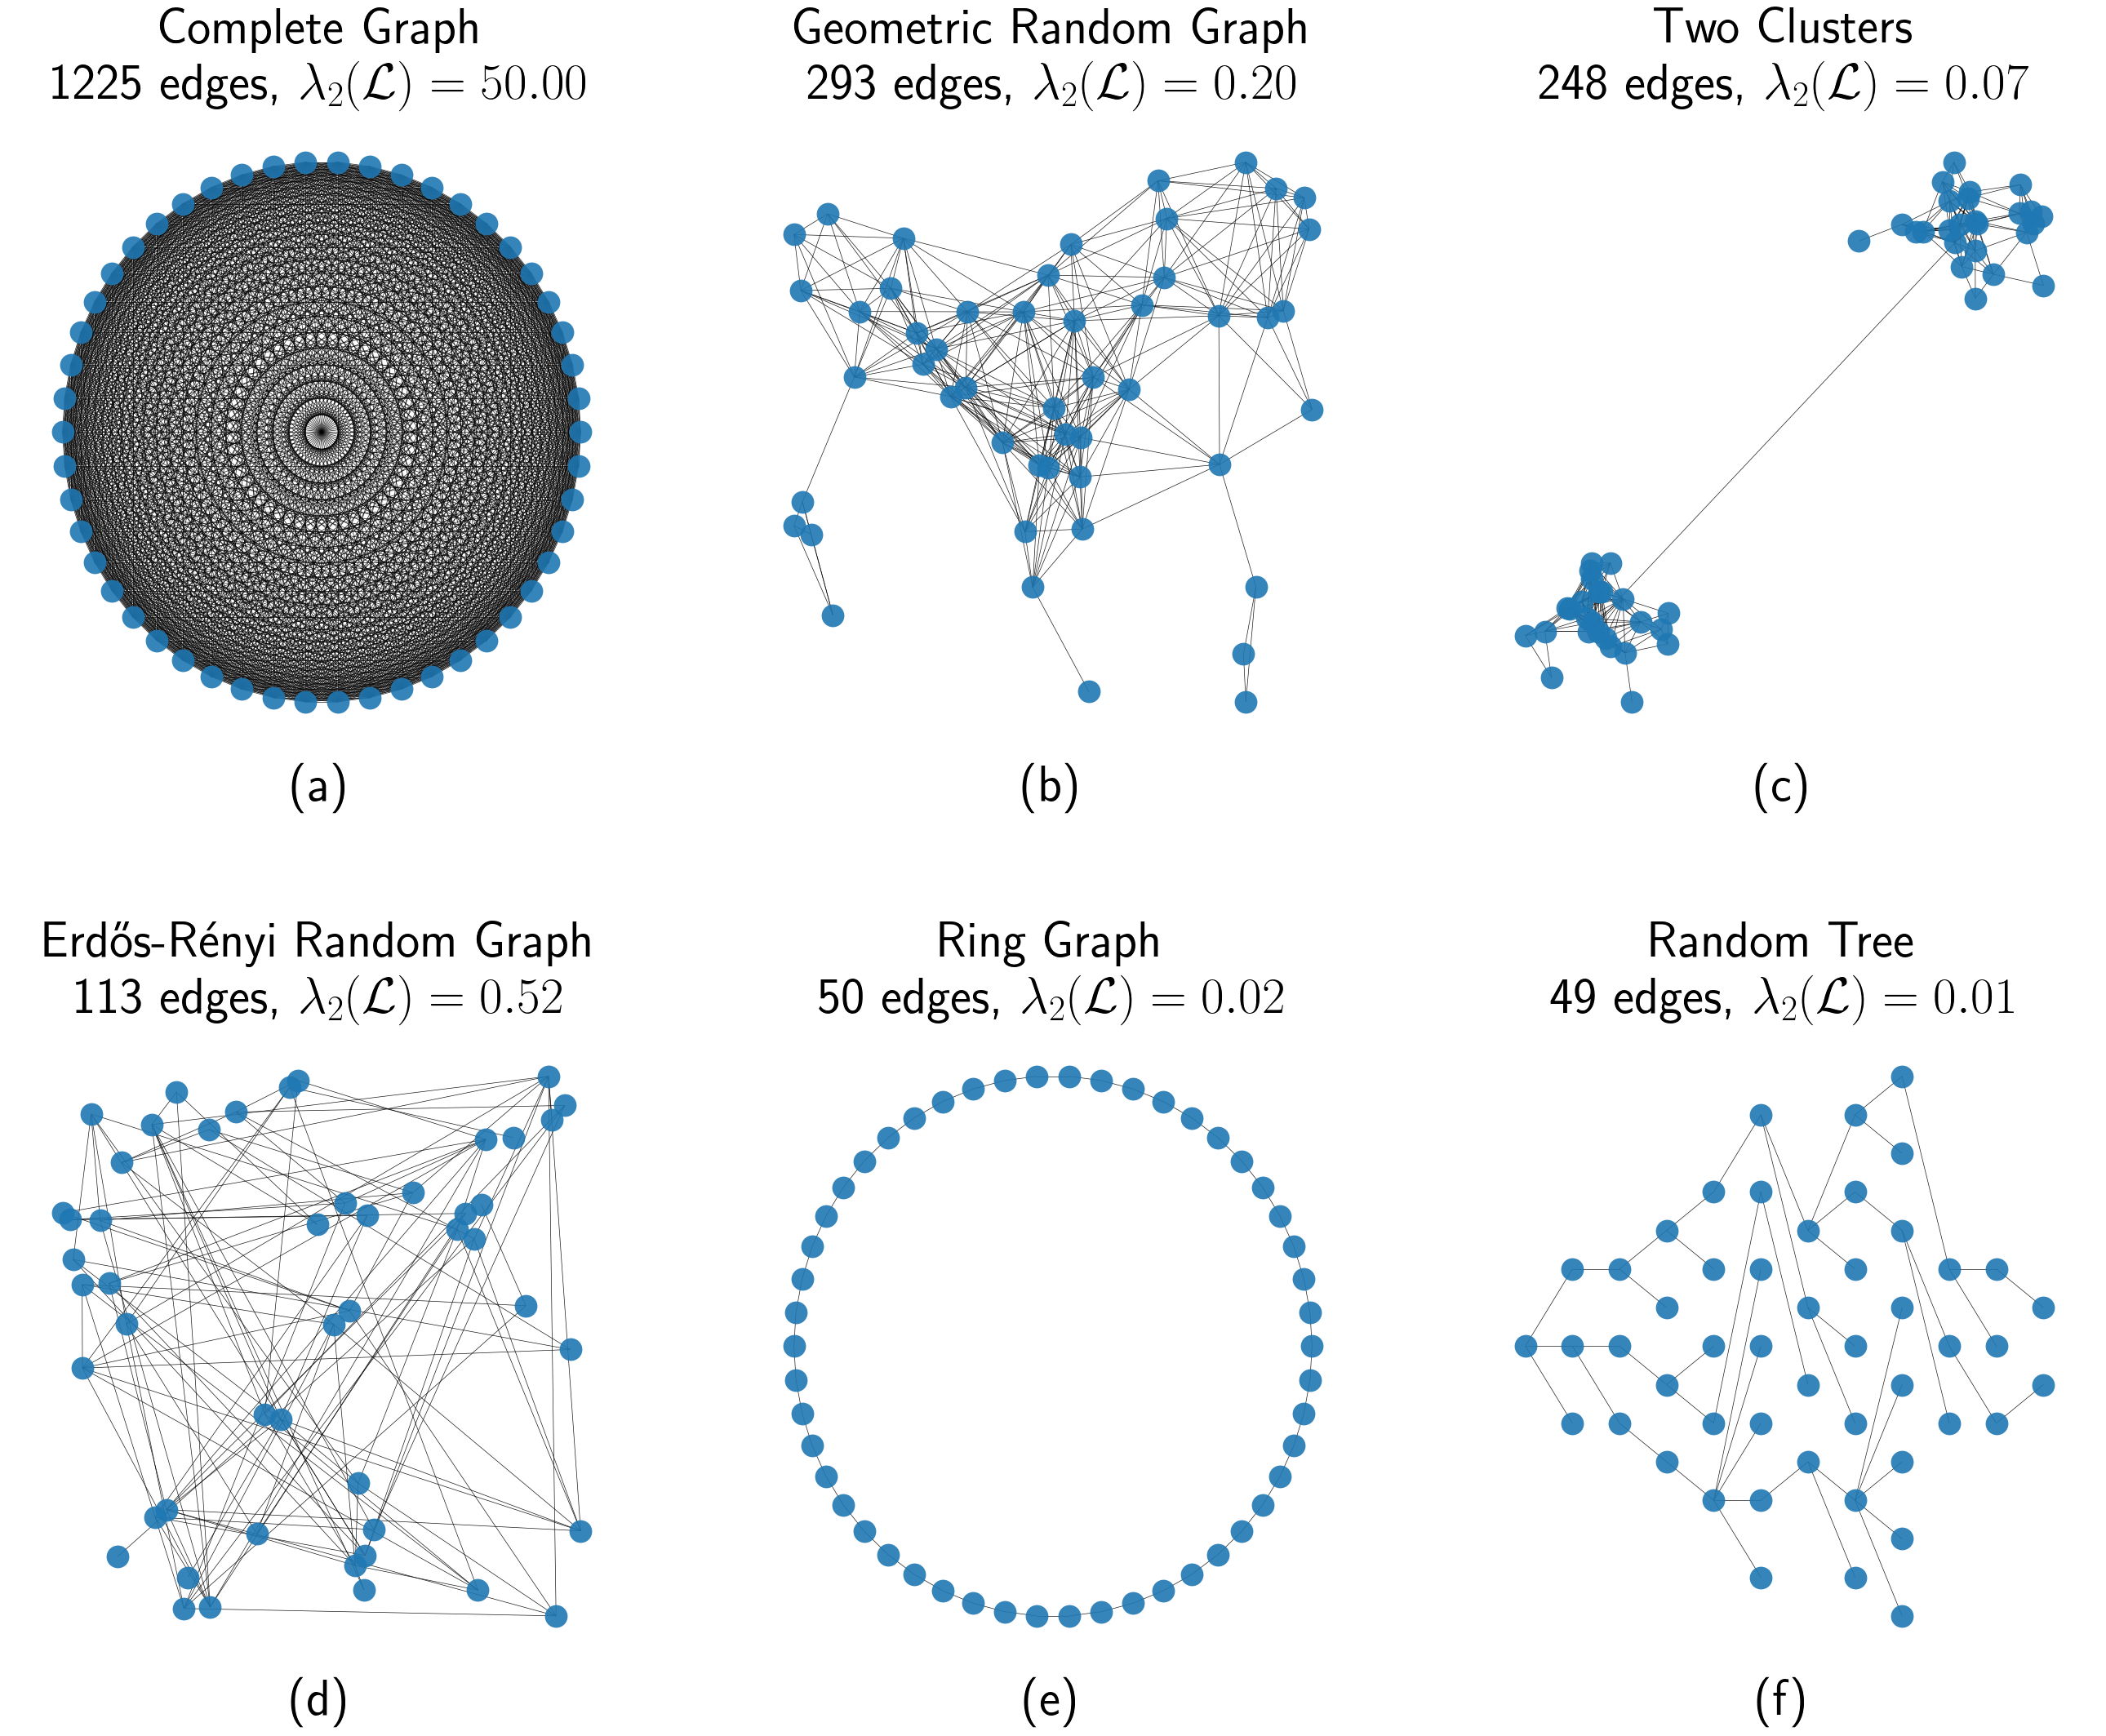

In [4]:
# plot graphs

plt.rcParams.update({
    'axes.facecolor': '#ffffff',
    'text.latex.preamble': r'',
})

# load graphs
N = 50  # num of nodes
graph_dir = 'graphs'
graph_names = [
    'complete_graph',
    'geometric_random_graph',
    '2_cliques',
    'erdos_renyi_graph',
    'ring_graph',
    'spanning_tree'
]
graphs = {}
for name in graph_names:
    with open(f'{graph_dir}/{name}.json') as f:
        data = json.load(f)
        graphs[name] = nx.node_link_graph(data, edges="links")


# prepare positions for plotting
poss = {}
for name in graph_names:
    G = graphs[name]
    nodes_data = G.nodes.data()
    pos = {}
    
    if name == '2_cliques' or name == 'geometric_random_graph':
        pos = {i: nodes_data[i]['pos'] for i in range(N)}
    elif name == 'complete_graph' or name == 'ring_graph':
        pos = nx.circular_layout(G)
    elif name == 'erdos_renyi_graph':
        pos = nx.random_layout(G)
    elif name == 'spanning_tree':
        pos = nx.bfs_layout(G, start=0)
    poss[name] = pos
    print(name, f'diameter={nx.diameter(G)}')
    # print(pos)
    # print(nx.laplacian_spectrum(G))

titles = [
    'Complete Graph',
    'Geometric Random Graph',
    'Two Clusters',
    'Erdős-Rényi Random Graph',
    'Ring Graph',
    'Random Tree'
]
# xlabels = [
#     # '(x)',
#     '(a)',
#     '(b)',
#     '(c)',
#     '(d)',
#     '(e)'
# ]
xlabels = [
    '(a)',
    '(b)',
    '(c)',
    '(d)',
    '(e)',
    '(f)'
]

fig = plt.figure(figsize=(32, 24))
# ax0 = plt.subplot2grid((2, 6), (0, 1), colspan=2)
# ax1 = plt.subplot2grid((2, 6), (0, 3), colspan=2)
# ax2 = plt.subplot2grid((2, 6), (1, 0), colspan=2)
# ax3 = plt.subplot2grid((2, 6), (1, 2), colspan=2)
# ax4 = plt.subplot2grid((2, 6), (1, 4), colspan=2)
# axs = [ax0, ax1, ax2, ax3, ax4]

ax0 = plt.subplot2grid((2, 6), (0, 0), colspan=2)
ax1 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax3 = plt.subplot2grid((2, 6), (1, 0), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 2), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 4), colspan=2)
axs = [ax0, ax1, ax2, ax3, ax4, ax5]

# fig, axs = plt.subplot_mosaic([[0, 1, 2],[3, 4, 5]], 
#                               layout='constrained',
#                               figsize=(32, 24))

for i in range(len(axs)):
    # axs[i].set_title(titles[i])
    # axs[i].set_ylim(ylimits[i])
    # # axs[i].set_xlabel(r'''$\mathrm{(a)}$''', fontsize=45)
    # axs[i].set_ylabel(ylabels[i], fontsize=45)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)   
    axs[i].set_xlabel(xlabels[i], fontsize=45) 
    
options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 400,
    'width': 0.5,
    'linewidths': 0.01,
    'with_labels': False,
    'alpha': 0.9,
    'edge_color': 'k'
}
for name in graph_names:
    i = graph_names.index(name)
    G = graphs[name]
    
    nx.draw_networkx(G, pos=poss[name], ax=axs[i], **options)
    axs[i].set_title(titles[i] + f'\n{G.number_of_edges()} edges, ' + \
                     r'$\lambda_2(\mathcal{L})=' + f'{nx.laplacian_spectrum(G)[1]:.2f}$', fontsize=45)

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# fig.savefig(f'chap5_five_graphs.pdf', bbox_inches='tight', transparent=False)
fig.savefig(f'chap5_six_graphs.pdf', bbox_inches='tight', transparent=False)